<a href="https://colab.research.google.com/github/susanaescamilla679-coder/Estadistica2025B/blob/main/Datos_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/Estadistica2025B-r/Estadistica2025B/refs/heads/main/Housing.csv"

df= pd.read_csv(url)
df = df.dropna()
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Y ~ X
modelo_lineal = ols('price ~ C(mainroad)+C(guestroom)+C(basement)+C(hotwaterheating)+C(airconditioning)+C(prefarea)+C(furnishingstatus)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
#Se rechaza la H0 por lo ponto si hay diferencia significativa
#En las categoricas es que no hay diferencia significativa en la hipotesis nula


,df,sum_sq,mean_sq,F,PR(>F)
C(mainroad),1.0,1.677653e+14,1.677653e+14,79.424431,7.830933e-18
C(guestroom),1.0,9.987699e+13,9.987699e+13,47.284338,1.714990e-11
C(basement),1.0,1.762876e+13,1.762876e+13,8.345910,4.021926e-03
C(hotwaterheating),1.0,1.822011e+13,1.822011e+13,8.625869,3.456687e-03
C(airconditioning),1.0,3.267211e+14,3.267211e+14,154.678162,2.236630e-31
C(prefarea),1.0,8.111191e+13,8.111191e+13,38.400465,1.149682e-09
C(furnishingstatus),2.0,5.971055e+13,2.985528e+13,14.134255,1.042234e-06
Residual,536.0,1.132173e+15,2.112264e+12,NaN,NaN


In [ ]:
#Cuando el valo-p es menor a un nivel de significacia SÍ HAY DIFERENCIA SIGNIFICATIVA
#test ANOVA
#H0:No hay diferencia etre grupos
#H1: Al menos un grupo es distinto a los demás


In [ ]:
df["mainroad"]= df["mainroad"].map({"no":0, "yes":1})
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished


In [ ]:
df["guestroom"]= df["guestroom"].map({"no":0, "yes":1})
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,no,no,no,0,no,furnished


In [ ]:
df["basement"]= df["basement"].map({"no":0, "yes":1})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,no,no,0,no,furnished


In [ ]:
df["hotwaterheating"]= df["hotwaterheating"].map({"no":0, "yes":1})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,no,0,no,furnished


In [ ]:
df["airconditioning"]= df["airconditioning"].map({"no":0, "yes":1})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,no,furnished


In [ ]:
df["prefarea"]= df["prefarea"].map({"no":0, "yes":1})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [ ]:
df["furnishingstatus"]= df["furnishingstatus"].map({"furnished":0, "semi-furnished":1, "unfurnished":3})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
df["furnishingstatus"].unique()

array([0, 1, 3])

In [ ]:
correlation_matrix["price"].sort_values().index

Index(['furnishingstatus', 'hotwaterheating', 'basement', 'guestroom',
       'mainroad', 'prefarea', 'bedrooms', 'parking', 'stories',
       'airconditioning', 'bathrooms', 'area', 'price'],
      dtype='object')

In [ ]:
correlation_matrix = df.corr()
display(correlation_matrix["price"].sort_values())

,price
furnishingstatus,-0.306433
hotwaterheating,0.093073
basement,0.187057
guestroom,0.255517
mainroad,0.296898
prefarea,0.329777
bedrooms,0.366494
parking,0.384394
stories,0.420712
airconditioning,0.452954


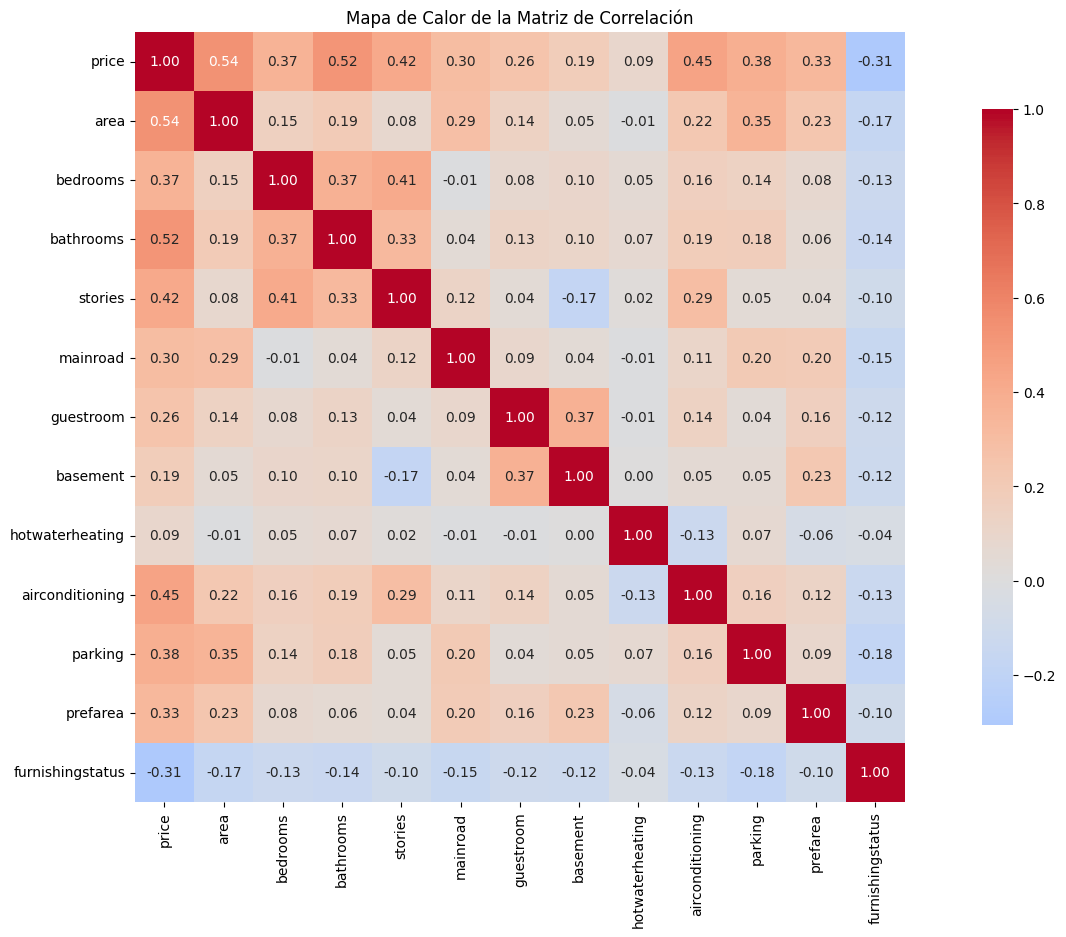

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, center=0, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

Coeficiente de determinación:  0.6271

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
area,1.0,5.467787e+14,5.467787e+14,412.922612,1.718324e-68
airconditioning,1.0,2.230298e+14,2.230298e+14,168.430242,1.098787e-33
bathrooms,1.0,2.668405e+14,2.668405e+14,201.515663,4.679874e-39
prefarea,1.0,6.407245e+13,6.407245e+13,48.386969,1.023388e-11
furnishingstatus,1.0,3.674084e+13,3.674084e+13,27.746371,2.006375e-07
mainroad,1.0,2.025435e+13,2.025435e+13,15.295911,1.037232e-04
guestroom,1.0,1.164350e+13,1.164350e+13,8.793076,3.158434e-03
hotwaterheating,1.0,2.409428e+13,2.409428e+13,18.195793,2.356368e-05
Residual,536.0,7.097537e+14,1.324167e+12,NaN,NaN


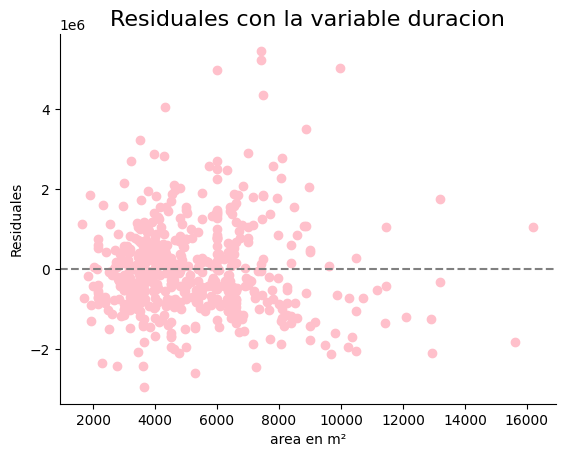

<Figure size 640x480 with 0 Axes>

In [ ]:
x = df[["area","airconditioning","bathrooms","prefarea","furnishingstatus","mainroad","guestroom","hotwaterheating"]]
y = df["price"]
# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')


# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure()
plt.scatter(x["area"], residuales, color = 'pink')
plt.xlabel('area en m²')
plt.ylabel('Residuales')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Residuales con la variable duracion", fontsize = 16)


plt.figure()
# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
# Assuming these values are for 'duracion' and 'porcentaje_grasa' respectively
# The model was trained with 9 features (including the constant), but the new data has only 3 features.
# This part of the code seems to be from a different analysis and is commented out.
# new_data = sm.add_constant([[70, 75], [75, 84], [84, 70]]) # Example values
# predictions = modelo.predict(new_data)
# print(f'Predictions for new data:\n{predictions}\n')


# 12. Realice una tabla ANOVA e interprete el resultado.
# This part of the code seems to be from a different analysis and is commented out.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols("price ~ area + airconditioning + bathrooms + prefarea + furnishingstatus + mainroad + guestroom + hotwaterheating", data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova